<a href="https://colab.research.google.com/github/Parveen2327/TCW-RPGP-DS01-02/blob/main/RPGP_Module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

Shape of dataset: (150, 6)

First 5 rows:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Data types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Statistical Summary:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.0000

In [5]:
df.drop('Id', axis=1, inplace=True)

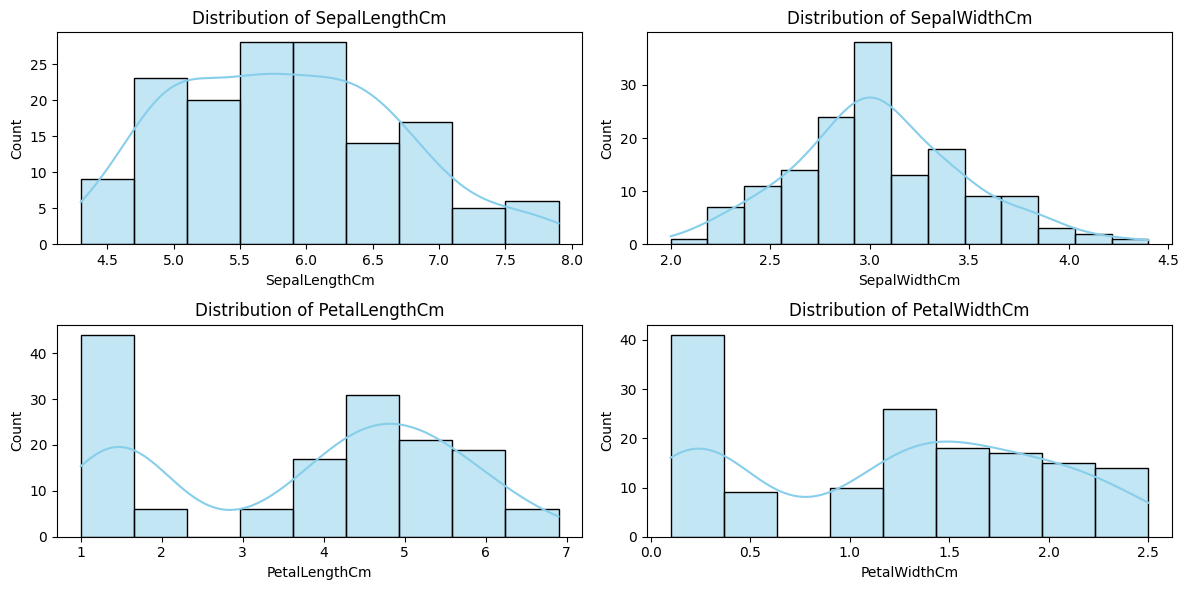

In [7]:
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

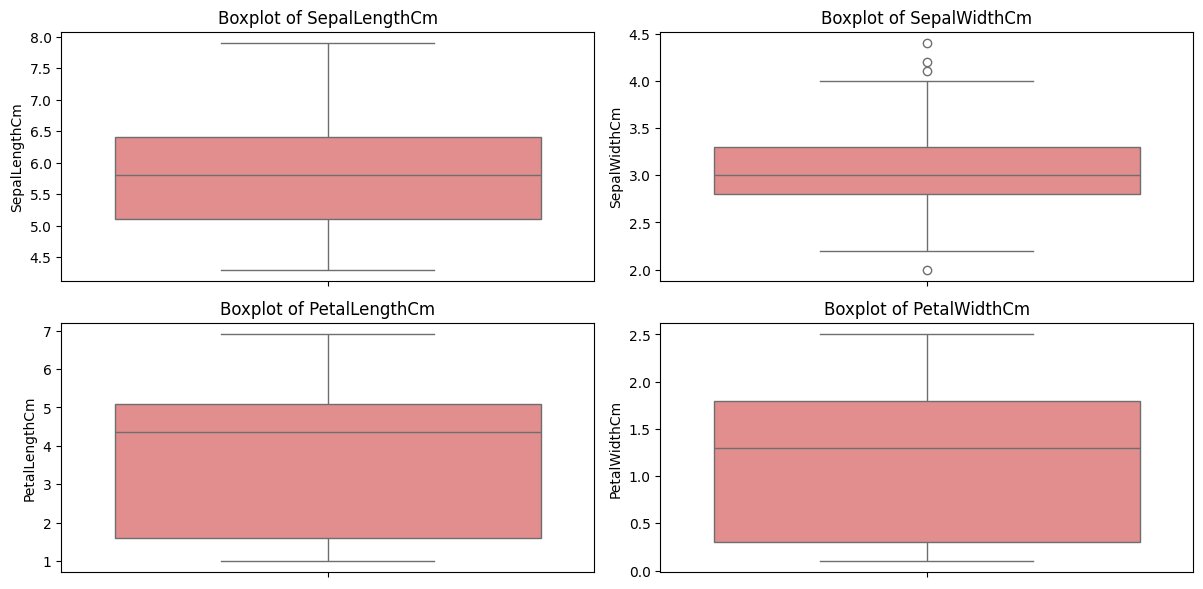

In [8]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

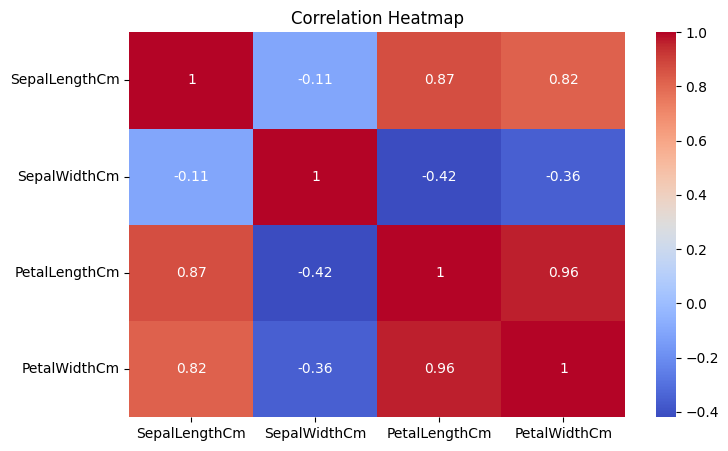

In [9]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Encoding: Species → numeric labels.

Scaling: Standardizes numeric columns so all have mean=0, std=1.

Binning: Groups SepalLengthCm into Short, Medium, Long.

In [10]:
le = LabelEncoder()
df['Species_encoded'] = le.fit_transform(df['Species'])

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_cols])
scaled_df = pd.DataFrame(scaled_features, columns=num_cols)

In [12]:
df['SepalLength_bin'] = pd.cut(df['SepalLengthCm'],
                               bins=[0, 5.0, 6.5, np.inf],
                               labels=['Short', 'Medium', 'Long'])

In [13]:
print("\nAfter Feature Engineering:\n", df.head())


After Feature Engineering:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Species_encoded SepalLength_bin  
0                0          Medium  
1                0           Short  
2                0           Short  
3                0           Short  
4                0           Short  


In [14]:
print("\nScaled Numeric Features:\n", scaled_df.head())


Scaled Numeric Features:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977


/tmp/ipython-input-4233616034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SepalLength_bin', palette='viridis')


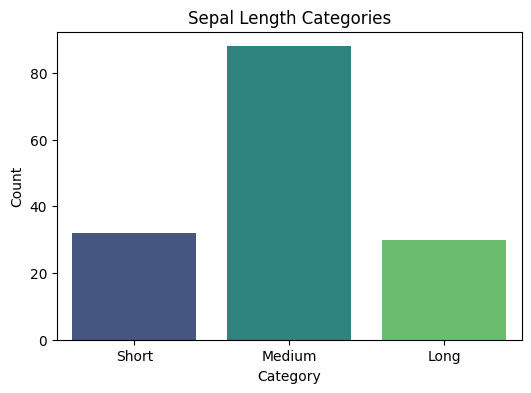

In [15]:
# Visualizing Binned Sepal Length
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SepalLength_bin', palette='viridis')
plt.title("Sepal Length Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
